# FAIRe Qualitäts-KPIs
Autor:  Sommer, Luca
Datum:  23.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: 

Erste Frage: Wie lassen sich die heutzutage geforderten Qualitätsdimensionen möglichst gut in einem Fahrzeug erfüllen? Zweite Frage: Wie kann man ein bestehendes Fahrzeug an Hand der Veränderung von verschiedenen KPIs und Konstruktionsmerkmalen so verbessern, dass die Qualitätsdimensionen besser erfüllt werden?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch: 

Mein Ziel ist es ein möglichst einfaches Fahrzeug aufzubauen, welches sich kostengünstig, schnell und einfach herstellen lässt. Dabei muss es die Funktion der Fortbewegung erfüllen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):

![Bild_Auto1](figures/Auto_1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug: 

Das Fahrzeug besitzt einen auf zwei einfachen Platten zusammengesetzten Rahmen. Auf diesem ist eine Batterie platziert. Der Motor sitzt auf einer Halterung am hinteren Ende des Fahrzeugs. Jeweils vorne und hinten sind im Rahmen zwei Steckachsen mit kleinen Felgen und Rädern montiert. Die Kraftübertragung ist über eine Zahnradstufe realisiert.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [2]:
# Die fahrzeugspezifischen Komponenten heruntergeladen und diese mit Namen versehen
# initialize components
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

# Create front axle:
front_axle = LegoComponent("front axle", axles["3737"]);
# Create back axle:
back_axle = LegoComponent("back axle", axles["3737"]);
# Create motor axle:
motor_axle = LegoComponent("motor axle", axles["32073"]);

with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

# Create left front wheel:
left_front_wheel = LegoComponent("left front wheel", wheels["3482c01"]);                               
# Create right front wheel:
right_front_wheel = LegoComponent("right front wheel", wheels["3482c01"]);
# Create left back wheels:
left_back_wheel = LegoComponent("left back wheel", wheels["3482c01"]);                               
# Create right back wheels:
right_back_wheel = LegoComponent("right back wheel", wheels["3482c01"]);
                                  
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)   
                                  
# Create front frame:
front_frame = LegoComponent("front frame", frame["32532"]);
# Create back frame:
back_frame = LegoComponent("back frame", frame["32532"]);
# Create motor frame:
motor_frame = LegoComponent("motor frame", frame["32531"]);

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
# Create Pin right:
pin_right = LegoComponent("pin right", frame["3673"]);
# Create Pin left:
pin_left = LegoComponent("pin left", frame["3673"]);

with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
# Create primary gear:
primary_gear = LegoComponent("primary gear", gears["32498"]);
# Create secondary gear:
secondary_gear = LegoComponent("secondary gear", gears["94925"]);

with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

# Create Batterie:
batterie = LegoComponent("batteries", batteries["2847c01"]);

with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

# Create motor:
motor = LegoComponent("motors", motors["8883-1"]);

In [3]:
# Dem Fahrzeug die entsprechenden geänderten Farben hinzugefügt
# set properties
front_frame.properties["color"] = "Black";
back_frame.properties["color"] = "Black";
motor_frame.properties["color"] = "Blue";

In [4]:
# Fahrzeug 1 zusammensetzen bzw. die verschiedenen Baugruppen erstellen
# aggregate components
suspension_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"suspension assembly",assembly_method="stick together like lego blocks",)
# Add Components
suspension_assembly.add([left_front_wheel, right_front_wheel, left_back_wheel, right_back_wheel, front_axle, back_axle]);

chassis_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"chassis assembly",assembly_method="connect lego blocks",)
# Add Components
chassis_assembly.add([front_frame, back_frame, pin_right, pin_left, motor_frame]);

power_unit_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"power unit assembly",assembly_method="connect lego blocks and electrical link",)
# Add Components
power_unit_assembly.add([motor_axle, motor, batterie]);

transmission_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"transmission assembly",assembly_method="create a mechanical connection",)
# Add Components
transmission_assembly.add([primary_gear, secondary_gear]);

first_car= LegoAssembly(AggregationLayer.SYSTEM,"first car",assembly_method="stick together a vehicle",manufactor="Luca Sommer")
# Add other subsystems
first_car.add([suspension_assembly, chassis_assembly, power_unit_assembly, transmission_assembly]);

pprint.pprint(first_car.get_component_list());

[LegoComponent left front wheel [2c5d2f79-3797-430b-9537-f0683faad4be],
 LegoComponent right front wheel [e45d5377-8179-4391-a487-9aba40800292],
 LegoComponent left back wheel [63b196a3-80a1-4c4f-94a4-5eeefa32bcb6],
 LegoComponent right back wheel [a722be6d-ec81-4399-97a8-eb01ee33137f],
 LegoComponent front axle [e4985913-12f3-40d3-a6f6-b5ce8c1a8252],
 LegoComponent back axle [edf9cdbb-b987-4de3-a7bb-4ea6452b0da5],
 LegoComponent front frame [7ef9ce14-770d-404e-ad41-d92c4d1309d4],
 LegoComponent back frame [b703901a-5c06-4f13-a013-bc3297ad2409],
 LegoComponent pin right [182c4322-ca97-4c31-8527-c69a8d547cec],
 LegoComponent pin left [f4f72340-b8fb-426c-acb5-1aa2e3c6ff7b],
 LegoComponent motor frame [0ffd6981-ec16-4177-b505-ca4667d0935b],
 LegoComponent motor axle [0a90976c-b1c4-4a1e-857e-fb3e9823bcd3],
 LegoComponent motors [add7fd20-2a95-43c1-bc75-fae8c1da969b],
 LegoComponent batteries [7754bb77-e940-4c35-8dbd-33fbd96381dc],
 LegoComponent primary gear [1dc58d28-19c4-4bac-89fc-718edf

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
Gesamtgewicht: \sum_{i=0}^{n} Summe\,aller\,Komponentengewichte 
$$

$$
Gesamtpreis: \sum_{i=0}^{n} Summe\,aller\,Komponentenpreise 
$$

$$
Lieferzeit: \max{(Lieferzeit\:Komponente)} 
$$

$$ Geschwindigkeit:\,Eigentlich\,noch\,Geschwindigkeit\,des\,Rades\,bestimmen,\,Aufwand\,jedoch\,zu\,groß $$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [5]:
# KPIs zum ersten Fahrzeug erstellen und und diesen ihre Bezeichnung zuordnen
# calculate the KPIs for your car
#calculation_rules.test_function();
Masse_1 = calculation_rules.kpi_mass(first_car)
Preis_1 = calculation_rules.kpi_price(first_car)
Lieferzeit_1 = calculation_rules.kpi_delivery_time(first_car)

# add KPI properties:
first_car.properties["Masse"] = Masse_1
first_car.properties["Preis"] = Preis_1
first_car.properties["Lieferzeit"] = Lieferzeit_1

In [6]:
# print your KPIs
print("Gesamtmasse:",Masse_1,"g")
print("Gesamtpreis:",Preis_1, "Euro")
print("Lieferzeit:",Lieferzeit_1,"Tage")

Gesamtmasse: 248.85999999999996 g
Gesamtpreis: 23.621 Euro
Lieferzeit: 12 Tage


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
# export car and its properties
# Fahrzeug 1 als seperaten JSON-File speichern
with open("first_car.json", "w") as fp:
    json.dump(first_car.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten: 


Mein Ziel ist es immer noch ein möglichst einfaches und praktikables Fahrzeug herzustellen. Hierbei möchte ich jedoch verschiedene Aspekte berücksichtigen. Das Fahrzeug sollte über einen aufladbaren Akku verfügen, der Fahrkomfort sollte gesteigert, die Sicherheit erhöht und die Übersetzung nicht über eine einfache Stirnradstufe, sondern über eine andere Form von Getriebe realisiert werden. Durch diese Veränderung möchte ich das Fahrzeug gezielt verbessern und seine Akzeptanz erhöhen. Trotzdem sollte sich das Fahrzeug immernoch schnell und kostengünstig herstellen lassen.


### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Bild_Auto2](figures/Auto_2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das Fahrzeug besitzt einen dreiteiligen Rahmen, der noch zusätlich eine Querstrebe zur Versteifung und Motorhalterung besitzt. In der Mitte des Fahrzeugs sind der Motor und auf einer seperaten Halterung der Akku montiert. Die Kraftübertragung erfolgt über ein im Rahmen platziertes Schneckengetriebe, welches selbsthemmend ausgeführt ist. Die vordere Achse ist als Steckachse ausgeführt und im Rahmen gelagert. Die Felgen sind im Vergleich zum ersten Auto größer und mit Reifen mit Straßenprofil bestückt. Zusätzlich sind die Räder gelagert.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [8]:
# Die fahrzeugspezifischen Komponenten heruntergeladen und diese mit Namen versehen
# initialize components

with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

# Create front axle:
front_axle_second_car = LegoComponent("front axle", axles["3737"]);
# Create back axle:
back_axle_second_car = LegoComponent("back axle", axles["3737"]);
# Create motor axle:
motor_axle_second_car = LegoComponent("motor axle", axles["32073"]);

with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

# Create left front wheel:
left_front_wheel_second_car = LegoComponent("left front wheel", wheels["56904c02"]);                               
# Create right front wheel:
right_front_wheel_second_car = LegoComponent("right front wheel", wheels["56904c02"]);
# Create left back wheel:
left_back_wheel_second_car = LegoComponent("left back wheel", wheels["56904c02"]);                               
# Create right back wheel:
right_back_wheel_second_car = LegoComponent("right back wheel", wheels["56904c02"]);

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
# Create left front wheel bearing:
left_front_wheelbearing_second_car = LegoComponent("left front wheel bearing", frame["32123"]);    
# Create right front wheel bearing:
right_front_wheelbearing_second_car = LegoComponent("right front wheel bearing", frame["32123"]);
# Create left back wheel bearing:
left_back_wheelbearing_second_car = LegoComponent("left back wheel bearing", frame["32123"]);
# Create right back wheel bearing:
right_back_wheelbearing_second_car = LegoComponent("right back wheel bearing", frame["32123"]);

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)   
                                  
# Create front frame:
front_frame_second_car = LegoComponent("front frame", frame["32532"]);
# Create middle frame:
middle_frame_second_car = LegoComponent("middle frame", frame["32532"]);
# Create cross brace:
cross_brace_second_car = LegoComponent("cross brace", frame["3701"]);
# Create back frame:
back_frame_second_car = LegoComponent("back frame", frame["32532"]);
# Create first batterie frame:
first_batterie_frame_second_car = LegoComponent("first batterie frame", frame["32531"]);
# Create second batterie frame:
second_batterie_frame_second_car = LegoComponent("second batterie frame", frame["32531"]);

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
# Create Pin right front:
pin_right_front_second_car = LegoComponent("pin right front", frame["3673"]);
# Create Pin left front:
pin_left_front_second_car = LegoComponent("pin left front", frame["3673"]);
# Create Pin right back:
pin_right_back_second_car = LegoComponent("pin right back", frame["3673"]);
# Create Pin left back:
pin_left_back_second_car = LegoComponent("pin left back", frame["3673"]);
# Create Pin cross brace:
pin_crossbrace_second_car = LegoComponent("pin cross brace", frame["32556"]);

with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
# Create primary gear:
primary_gear_second_car = LegoComponent("primary gear", gears["3650"]);
# Create secondary worm gear:
secondary_worm_gear_second_car = LegoComponent("secondary worm gear", gears["4716"]);
# Create worm gear box
worm_gear_box_second_car = LegoComponent("worm gear box", gears["6588"]);

with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

# Create Batterie:
batterie_second_car = LegoComponent("batteries", batteries["8878-1"]);

with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

# Create motor:
motor_second_car = LegoComponent("motors", motors["8883-1"]);

In [9]:
# Dem Fahrzeug die entsprechenden geänderten Farben hinzugefügt
# set properties
front_frame_second_car.properties["color"] = "Black";
middle_frame_second_car.properties["color"] = "Black";
back_frame_second_car.properties["color"] = "Black";
worm_gear_box_second_car.properties["color"] = "Blue";
batterie_second_car.properties["color"] = "Light Yellow";
left_front_wheelbearing_second_car.properties["color"] = "Light Yellow";
right_front_wheelbearing_second_car.properties["color"] = "Light Yellow";
left_front_wheelbearing_second_car.properties["color"] = "Light Yellow";
right_front_wheelbearing_second_car.properties["color"] = "Light Yellow";

In [10]:
# Fahrzeug 2 zusammensetzen bzw. die verschiedenen Baugruppen erstellen
# aggregate components
suspension_assembly_second_car = LegoAssembly(AggregationLayer.SUBASSEMBLY,"suspension assembly second car",assembly_method="stick together like lego blocks",)
# Add Components
suspension_assembly_second_car.add([front_axle_second_car, back_axle_second_car, left_front_wheel_second_car, right_front_wheel_second_car, left_back_wheel_second_car, right_back_wheel_second_car, left_front_wheelbearing_second_car, right_front_wheelbearing_second_car, left_back_wheelbearing_second_car, right_back_wheelbearing_second_car]);

chassis_assembly_second_car = LegoAssembly(AggregationLayer.SUBASSEMBLY,"chassis assembly",assembly_method="connect lego blocks",)
# Add Components
chassis_assembly_second_car.add([front_frame_second_car, middle_frame_second_car, back_frame_second_car, cross_brace_second_car,  first_batterie_frame_second_car, second_batterie_frame_second_car, pin_right_front_second_car, pin_left_front_second_car, pin_right_back_second_car, pin_left_back_second_car, pin_crossbrace_second_car]);

power_unit_assembly_second_car = LegoAssembly(AggregationLayer.SUBASSEMBLY,"power unit assembly second car",assembly_method="connect lego blocks and electrical link",)
# Add Components
power_unit_assembly_second_car.add([motor_second_car, batterie_second_car, motor_axle_second_car]);

transmission_assembly_second_car = LegoAssembly(AggregationLayer.SUBASSEMBLY,"transmission assembly second car",assembly_method="create a mechanical connection",)
# Add Components
transmission_assembly_second_car.add([primary_gear_second_car, secondary_worm_gear_second_car, worm_gear_box_second_car]);

second_car= LegoAssembly(AggregationLayer.SYSTEM,"second car",assembly_method="stick together a vehicle",manufactor="Luca Sommer")
# Add other subsystems
second_car.add([suspension_assembly_second_car, chassis_assembly_second_car, power_unit_assembly_second_car, transmission_assembly_second_car]);

pprint.pprint(second_car.get_component_list());

[LegoComponent front axle [269ec5a3-c6b9-44c2-a85b-23efc2ea82cf],
 LegoComponent back axle [a7c27aca-8c77-4db4-ba39-7b42951228eb],
 LegoComponent left front wheel [181c0de3-e795-4cb4-b562-5fc4ed2228f1],
 LegoComponent right front wheel [9921b566-c066-4937-ad45-8ba828bb1028],
 LegoComponent left back wheel [6c2c4300-6257-49b3-a79f-51b24ed36d67],
 LegoComponent right back wheel [ac11c0bf-d368-44fb-8edf-ece44608e373],
 LegoComponent left front wheel bearing [9954a5d8-e6d0-446f-b699-096c8c9a1399],
 LegoComponent right front wheel bearing [540d69f8-0182-4d2d-bf1a-e07c95b133cc],
 LegoComponent left back wheel bearing [eedac418-64af-4c10-98dd-a27fca8ac562],
 LegoComponent right back wheel bearing [7cdc1560-aaff-4ef1-a98a-3a16cf6d8fb3],
 LegoComponent front frame [c1dd8fc5-f853-4c8f-8c85-73d99173659d],
 LegoComponent middle frame [abf08259-9ccb-43cd-bcb6-806424751894],
 LegoComponent back frame [557e4f62-3ed7-407b-bc85-5740e8c3c4b5],
 LegoComponent cross brace [2b4f4caf-2408-4c77-89e9-17996cd5

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [11]:
# KPIs zum zweiten Fahrzeug erstellen und und diesen ihre Bezeichnung zuordnen
# calculate the KPIs for your car
Masse_2 = calculation_rules.kpi_mass(second_car)
Preis_2 = calculation_rules.kpi_price(second_car)
Lieferzeit_2 = calculation_rules.kpi_delivery_time(second_car)

# add KPI properties:
second_car.properties["Masse"] = Masse_2
second_car.properties["Preis"] = Preis_2
second_car.properties["Lieferzeit"] = Lieferzeit_2

In [12]:
# print your KPIs
print("Gesamtmasse:",Masse_2,"g")
print("Gesamtpreis:",Preis_2, "Euro")
print("Lieferzeit:",Lieferzeit_2,"Tage")

Gesamtmasse: 217.09999999999997 g
Gesamtpreis: 78.65100000000001 Euro
Lieferzeit: 13 Tage


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [13]:
# export car and its properties
# Fahrzeug 2 als seperaten JSON-File speichern
with open("second_car.json", "w") as fp:
    json.dump(second_car.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

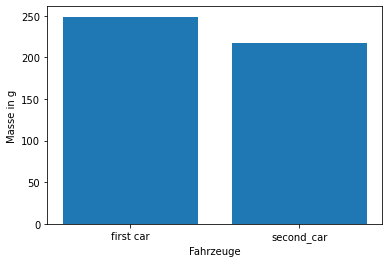

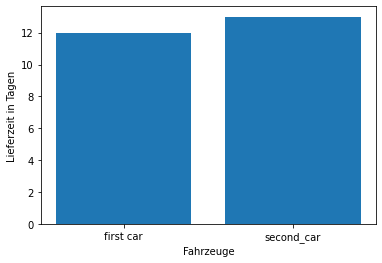

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the data, save diagramm as svg-file
# Plots erstellt, welche die KPIs der Fahrzeuge in Balkendiagrammen miteinander vergleichen
import matplotlib.pyplot as plt

# kpi Preis:
xwerte = ["first car", "second_car"];
ywerte = [Preis_1, Preis_2];
plt.bar(xwerte, ywerte)
plt.xlabel("Fahrzeuge")
plt.ylabel("Preis in Euro")
plt.show()

# kpi Masse:
xwerte = ["first car", "second_car"];
ywerte = [Masse_1, Masse_2];
plt.bar(xwerte, ywerte)
plt.xlabel("Fahrzeuge")
plt.ylabel("Masse in g")
plt.show()

# kpi Lieferzeit:
xwerte = ["first car", "second_car"];
ywerte = [Lieferzeit_1, Lieferzeit_2];
plt.bar(xwerte, ywerte)
#plt.bar(color='red')
plt.xlabel("Fahrzeuge")
plt.ylabel("Lieferzeit in Tagen")
plt.show()

plt.savefig("KPI_Vergleichsdiagramme.svg");

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die Lieferzeit und die Masse der beiden Fahrzeuge zeigen weniger starke Schwankungen auf. Der Preis unterscheidet sich jedoch stärker voneinander. Meinen Erwartungen zu Folge ist der Preis des zweiten Autos deutlich höher geworden. Ich führe dies auf höherwertige Komponenten und vorallem den teureren Akku zurück. Diesen wollte ich aber unbedingt benutzen, da der Akku wiederaufladbar ist, was ich aus Gründen der Nachhaltigkeit gerne umsetzen wollte. Das Gewicht ist beim zweiten Auto geringer als beim ersten Auto. In diesem Punkt konnte ich meine gewünschte Verbesserung erzielen, da der Ressourceneinsatz reduziert und die Akzeptant erhöht wurde. Zudem liegt ein von den Komponenten her höherwertiges Fahrzeug vor, wodurch der Fahrkomfort verbessert wurde. All diese Ziele konnte ich bei einem geringeren Gewicht erfüllen. Somit hat sich das KPI Gewicht stark verbessert.
Insgesamt würde ich die Qualität der beiden Fahrzeuge als ähnlich bewerten, denn beide Fahrzeuge erfüllen die von mir vorgegebenen KPIs und Qualitätsdimensionen recht gut. Das erste Auto ist relativ günstig, aber dafür auch schwerer als das zweite Auto. Dieses ist zwar teurer, verfügt dafür aber über einige Verbesserungen. In Punkto Lieferzeit sind beide Fahrzeuge gleich auf. Somit erfüllen beide Fahrzeugen die von mir geforderten Anforderungen, wobei ein wesentlicher KPI beim zweiten Fahrzeug verbessert wurde. Eigentlich wollte ich noch die Geschwindigkeit bzw. das Moment am Rad der Fahrzeuge bestimmen, was sich jedoch als zu kompliziert herausstellte.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die von mir gewählten KPIs sind Gewicht, Preis und die Lieferzeit (Moment bzw. Geschwindigkeit leider schwierig umsetzbar).
Erläuterung der KPIs in Bezug auf die FAIR-Prinzipien:

Findable: Die Datensätze waren gut auffindbar und die Daten sind über Git und später Jupyterhub gut zugänglich. Alle von mir  verwendeten Daten sind im Code oder dieser Datei auffindbar und für Dritte einzusehen bzw. nachvollziehbar.

Accessible: Git und Jupyterhub können nach dem erstellen eines Accounts von theoretisch jedem genutzt werden, somit sind auch meine Arbeiten nach Freigabe meiner Abgabe einsehbar. Die Bauteildaten sind frei im Internet, z.B. bei Lego verfügbar, somit sind die Daten der Komponenten zugänglich. LeoCAD ist kostenlos verfügbar. Daher könnte man die Autos auch selber leicht nachbauen oder rekonstruieren.

Interoperable: Der Code wurde in Python programmiert, diese Programmiersprache ist ein open source Programm, so dass jeder darauf zeugreifen kann. Die Maschinenlesbarkeit ist durch die Python- und JSON Dateien zudem auch gewährleistet.

Reusable: Alle Daten sind nachvollziehbar dokumentiert und können zu jeder Zeit nachverfolgt und geprüft werden. Durch die Versionierung sind Kommentare zur Erstellung und ein Datum hiterlegt. Alle geforderten Regularien zur Vewendung der Daten wurden eingehalten.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Insgesamt war das Projekt für mich sehr aufschlussreich, da ich gelernt habe, wie man ein Objekt bzw. Fahrzeug an Hand von verschiedenen Qualitätsdimensionen gestaltet und bewertet. Zuerst fiel es mir etwas schwer die Anforderungen und Qualitätsdimensionen in KPIs zu verfassen und auch für beide Autos ein Entwicklungsziel zu formulieren. In Verlauf des Projektes gefiel es mir besonders gut das Fahrzeug zu gestalten und die verschiedenen Bauteile mit ihren Eigenschaften zu hinterlegen und diese später in Funktionen zu nutzen, um dabei tatsächlich gut quantifizierbare KPIs zu erhalten, mit denen man zwei doch unterschiedliche Fahrzeuge vergleichen kann. Die Komplexität im Umgang mit doch recht vielen Daten habe ich vorher etwas schwieriger angesehen, als nach diesem Projekt, da man mit einer guten Struktur doch recht gut mit vielen Daten umgehen kann. Auch der Umgang mit Git und dem JupyterNotebook wurde mir deutlich näher gebracht und ist für mich nach dem Projekt besser verständlich.